# Exploratory Data Analysis of Insomnia in Adolescence 

### 1. Install and Import Neccessary Libraries 

In [1]:
#pip install pandas

In [2]:
#pip install numpy

In [3]:
#pip install matplotlib 

In [4]:
#pip install seaborn

In [5]:
#pip install scipy

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

### 2. Data Exploration

In [7]:
df = pd.read_csv('insomnia/insomnia_data.csv')

In [8]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total
0,sub_001,0,0,0,0,19.3,0,0,0,0,...,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806
1,sub_002,0,0,0,0,19.3,0,0,0,0,...,1.545013,0.327833,1.078180,-0.552396,-0.302127,-0.114565,1.083087,-0.656051,0.538016,0.153943
2,sub_003,0,0,0,1,18.8,0,0,0,0,...,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473
3,sub_004,0,0,0,0,18.8,0,0,0,0,...,-1.824849,-1.559689,-0.612036,-0.552396,0.249836,-0.114565,0.596210,-0.116442,0.538016,0.224254
4,sub_005,1,2,0,1,19.6,0,0,0,0,...,-2.199279,-0.615928,-0.950080,0.588422,1.353763,0.196397,0.109334,0.153363,1.336632,0.857049


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Columns: 174 entries, ID to ZDERS_total
dtypes: float64(92), int64(76), object(6)
memory usage: 129.3+ KB


In [10]:
# display all rows 
pd.set_option('display.max_rows', None)

#df

In [11]:
# display all columns 
pd.set_option('display.max_columns', None) 

#df

In [12]:
# Let's read-in the file with the variables dictionary 
varis = pd.read_csv('insomnia/insomnia_data_dictionary.csv')

In [13]:
varis.head()

,Group,"INSOMNIA= 1, CONTROL=0"
0,SubGroup,"clean INSOMNIA= 2, subclinical INSOMNIA = 1, C..."
1,Remote,"Remote data collection = 1, In person data col..."
2,Sex,"MALE = 1, FEMALE = 0"
3,Age,Years
4,American_Indian,race


In [14]:
varis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Group                   94 non-null     object
 1   INSOMNIA= 1, CONTROL=0  94 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


### 3. Cleaning 

I want the headings to become variables (in the variable dictionary file).

In [15]:
# Read the file without considering the first row as the header
varis = pd.read_csv('insomnia/insomnia_data_dictionary.csv', header=None)

# Transpose the DataFrame (swap rows and columns)
varis = varis.T

# Extract the first row of the transposed DataFrame + set as column 
varis.columns = varis.iloc[0]

# Remove the row, which is now the column names
varis = varis[1:]

# Reset the index 
varis.reset_index(drop=True, inplace=True)

# Display the DataFrame
#print(varis)
varis

,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_disengage_su,cope_substance_use,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity
0,"INSOMNIA= 1, CONTROL=0","clean INSOMNIA= 2, subclinical INSOMNIA = 1, C...","Remote data collection = 1, In person data col...","MALE = 1, FEMALE = 0",Years,race,race,race,race,race,race,ethnicity,ethnicity,ethnicity,Pubertal Development Scale for FEMALES,Pubertal Development Scale for MALES,ISI total (Insomnia severity index ),PSQI total (Pittsburgh sleep quality index ),BDI-II Total Score (Becks Depression inventory),ASHS Total (Adolescent Sleep Hygiene Scale),ASHS - Physiological Domain (Adolescent Sleep ...,ASHS - Cognitive Domain (Adolescent Sleep Hygi...,ASHS - Emotional Domain (Adolescent Sleep Hygi...,ASHS - Sleep Environment (Adolescent Sleep Hyg...,ASHS - Daytime Sleep (Adolescent Sleep Hygiene...,ASHS - Substances (Adolescent Sleep Hygiene Sc...,ASHS - Bedtime Routine (Adolescent Sleep Hygie...,ASHS - Sleep Stability (Adolescent Sleep Hygie...,ASHS - Bed / Bedroom sharing (Adolescent Sleep...,DBAS Total Score (Dysfunctional Beliefs and At...,FIRST Total Score (Ford insomnia Response to S...,GCTI Total Score (The Glasgow Content of Thoug...,GCTI Sleep Related Anxiety (The Glasgow Conten...,GCTI Reflection and Planning (The Glasgow Cont...,GCTI General Worries (The Glasgow Content of T...,GCTI Thoughts About the Environment (The Glasg...,GCTI Negative Affect (The Glasgow Content of T...,STAI Y-2 Total Score (State-Trait Anxiety Inve...,Neuroticism,Extroversion,Openness,Agreeableness,Conscientiousness,MEQr Total (The Morningness-Eveningness Questi...,PSRS Prolonged Reactivity (PrR) (Perceived Str...,PSRS Reactivity to Work Overload (RWO) (Percei...,PSRS Reactivity to Social Conflict (RSC) (Perc...,PSRS Reactivity to Failure (RFa) (Perceived St...,PSRS Reactivity to Social Evaluation (RSE) (Pe...,Perceived Stress Reactivity Total Score (PSRS-...,PSS Total Score (Perceived stress scale),TCQI-R Total Score (Thought Control Questionna...,Aggressive Suppression TCQI-R (Thought Control...,Cognitive Distraction / Suppression TCQI-R (Th...,Reappraisal TCQI-R (Thought Control Questionna...,Behavioral Distraction / Suppression TCQI-R (T...,Social Avoidance TCQI-R (Thought Control Quest...,Worry TCQI-R (Thought Control Questionnaire In...,ACE Total (The Adverse Childhood Experiences ),Stress of Home Life ASQ (Adolescent Stress Que...,Stress of School Performance ASQ (Adolescent S...,Stress of School Attendance ASQ (Adolescent St...,Stress of Romantic Relationships ASQ (Adolesce...,Stress of Peer Pressure ASQ (Adolescent Stress...,Stress of Teacher Interaction ASQ (Adolescent ...,Stress of Future Uncertainty ASQ (Adolescent S...,Stress of School / Leisure Conflict ASQ (Adole...,Stress of Financial Pressure ASQ (Adolescent S...,Stress of Eme

#### Adjust 'Age' column

In [16]:
# Check that the age range is within adolescence 

df['Age'].dtype

for i in df['Age']: 
    if 10 <= i <= 20: # I will allow decimal numbers of 19 (ex. 19.3) to count as an adolescent in this project 
        #print(f'Age {i}: Adolescent')
        continue 
    else:
        print(f'Age {i}: Non-Adolescent')

Age 20.1: Non-Adolescent


In [17]:
# Delete the row with the non-adolescent 

non_adolescent = (df['Age'] < 10) | (df['Age'] > 20)
df.drop(df[non_adolescent].index, inplace=True)

#### Check Data Types + Address Missing Data

In [18]:
df.select_dtypes(include=['object']).head()

,ID,ASHS_physiological,DBAS_total,cope_religion,ZASHS_physiological,ZDBAS_total
0,sub_001,5.8,28.75,6,1.035355589,-0.647679568
1,sub_002,5.6,11.81,5,0.716262391,-1.909842154
2,sub_003,5,,4,-0.241017203,
3,sub_004,4.4,19.63,4,-1.198296796,-1.327663839
4,sub_005,4.4,55.31,4,-1.198296796,1.331726701


Only the 'ID' column will remain intact. Let's check this column for duplicates. 

In [19]:
df[df.duplicated('ID')]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,Unnamed: 95,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total


##### Address null values

In [20]:
def columns_with_null(df):
    null_counts = df.isna().sum()
    columns_with_null = null_counts[null_counts > 0]
    return columns_with_null

columns_with_null_values = columns_with_null(df)
columns_with_null_values

PDS_FEMALE             35
PDS_MALE               59
ASHS_substances         2
ASHS_BedroomSharing     2
ACE_tot                 1
asq_finance             1
asq_responsibility      1
cope_disengage_su       1
cope_religion           1
ders_impulse            1
Unnamed: 95            94
dtype: int64

In [21]:
# Drop null values if they make up ≤ 5% of the total values 

threshold = len(df) * 0.05 
print(threshold)

drop_cols = df.columns[ df.isna().sum() <= threshold]
#print(drop_cols) 

# Drop these columns  
df.dropna(subset = drop_cols, inplace=True)

# See what columns with null values are left 

def columns_with_null(df):
    null_counts = df.isna().sum()
    columns_with_null = null_counts[null_counts > 0]
    return columns_with_null
columns_with_null_values = columns_with_null(df)
columns_with_null_values

4.7


PDS_FEMALE     32
PDS_MALE       53
Unnamed: 95    85
dtype: int64

In [22]:
null_count = df.isnull().sum()

total_null_count = null_count.sum() 
print(f'Total amount of null values left: {total_null_count}')

print(null_count[null_count > 0])

Total amount of null values left: 170
PDS_FEMALE     32
PDS_MALE       53
Unnamed: 95    85
dtype: int64


In [23]:
df = df.drop(columns=['Unnamed: 95'])

##### PDS (Pubertal Developmental Scale) column

It is redundant to have a separate PDS for male/female since we have a sex column. 

Let's combine these 2 columns such that the floats replace the missing data. 

In [24]:
# Create a new database to view these 2 columns together 

df_combined = pd.concat([df['PDS_FEMALE'], df['PDS_MALE']], axis=1)
df_combined.head()

,PDS_FEMALE,PDS_MALE
0,16.0,NaN
1,13.0,NaN
2,NaN,16.0
3,17.0,NaN
4,NaN,14.0


In [25]:
def get_non_nan_value(row):
    if pd.notna(row['PDS_FEMALE']):
        return row['PDS_FEMALE']
    elif pd.notna(row['PDS_MALE']):
        return row['PDS_MALE']
    else:
        return None  # Return None if both columns are NaN

# Apply the custom function to each row and create a new 'non_nan_value' column

df['PDS'] = df.apply(get_non_nan_value, axis=1)

df['PDS'].head()

0    16.0
1    13.0
2    16.0
3    17.0
4    14.0
Name: PDS, dtype: float64

In [26]:
df = df.drop(columns=['PDS_FEMALE', 'PDS_MALE'])

##### Address missing data

Now, I will address missing data to be able to convert datatypes. 

In [27]:
df[df['ASHS_physiological'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
22,sub_023,1,1,0,0,18.0,0,1,0,0,0,0,0,1,0,11,8,9,4.0,,3.17,5.0,4.25,3,6.0,1,3.25,3.5,45.31,21,46,12,12,7,5,5,41,17,24,26,20,31,56,3,2,5,5,4,19,19,72,11,12,18,14,7,10,0.0,25,16,7,5,7,7,15,9,4.0,4.0,50,37,17,4.0,15,5,12,15,11,4,4,4,4,6,16,9,7,15,11,94,17,12.0,27,14,13,0.83108,0.789651,0.871705,-1.163797,,-0.531095,0.136307,-1.918984,-1.719782,0.362017,-0.980406,-0.813213,-0.012113,0.586538458,0.301595,0.059596,-0.302312,1.064762,-0.243269,0.035521,-0.060459,-0.236018,-0.269607,-1.03874,0.002301,-1.063912,0.185958,0.810673,-0.889479,-0.869416,0.007586,0.357673,-0.266314,-0.740028,0.174689,0.404902,-0.648266,0.320083,0.734752,1.256609,0.039558,-0.591536,-0.595162,0.431524,-0.057715,0.881999,-0.770317,-1.088046,-0.774428,2.167213,-0.462184,-1.002415,-0.283718,2.150944,3.15745,0.759827,1.228459,-1.825027,1.293401,1.488683,0.249248,-0.541013,-0.611553,-1.400556,-0.783581,-1.275546,1.541486,-0.239368,-0.701562,-0.615928,1.416224,0.303217,1.077781,0.507359,1.245379,-0.116442,0.538016,1.06798,15.0


In [28]:
df[df['DBAS_total'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
2,sub_003,0,0,0,1,18.8,0,0,0,0,1,0,0,1,0,2,4,0,4.86,5,5.33,5.33,5.75,6,6.0,1,3.5,3.5,,14,30,8,7,5,3,4,50,19,27,29,21,33,35,6,4,4,5,4,23,19,63,8,12,15,15,5,8,0.0,19,20,6,8,8,10,6,10,7.0,4.0,36,16,10,4.0,14,9,10,14,7,4,4,9,6,6,16,10,12,9,9,70,8,9.0,21,12,11,-1.005027,-0.562004,-1.01515,0.910837,-0.241017203,1.715147,0.567948,0.679165,0.915368,0.362017,-0.980406,-0.477321,-0.012113,,-0.944122,-1.148211,-1.117054,-0.71609,-0.965476,-0.928626,-0.634815,1.146142,0.1043,-0.385228,0.65812,-0.909368,0.550206,-1.912042,0.908404,-0.009056,-0.713085,0.357673,-0.266314,0.109551,0.174689,-0.570284,-1.949364,0.320083,-0.086441,1.60669,-1.213097,-1.199059,-0.595162,-0.31838,0.649758,0.344884,0.104346,-0.813141,0.087728,-0.870438,-0.17707,0.028951,-0.283718,-0.078795,-0.774581,-0.824138,0.84074,0.162108,0.641554,1.175102,-1.472828,-0.541013,-0.611553,0.002955,0.319237,-1.275546,1.541486,-0.239368,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473,16.0


In [29]:
df[df['ZASHS_physiological'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
22,sub_023,1,1,0,0,18.0,0,1,0,0,0,0,0,1,0,11,8,9,4.0,,3.17,5.0,4.25,3,6.0,1,3.25,3.5,45.31,21,46,12,12,7,5,5,41,17,24,26,20,31,56,3,2,5,5,4,19,19,72,11,12,18,14,7,10,0.0,25,16,7,5,7,7,15,9,4.0,4.0,50,37,17,4.0,15,5,12,15,11,4,4,4,4,6,16,9,7,15,11,94,17,12.0,27,14,13,0.83108,0.789651,0.871705,-1.163797,,-0.531095,0.136307,-1.918984,-1.719782,0.362017,-0.980406,-0.813213,-0.012113,0.586538458,0.301595,0.059596,-0.302312,1.064762,-0.243269,0.035521,-0.060459,-0.236018,-0.269607,-1.03874,0.002301,-1.063912,0.185958,0.810673,-0.889479,-0.869416,0.007586,0.357673,-0.266314,-0.740028,0.174689,0.404902,-0.648266,0.320083,0.734752,1.256609,0.039558,-0.591536,-0.595162,0.431524,-0.057715,0.881999,-0.770317,-1.088046,-0.774428,2.167213,-0.462184,-1.002415,-0.283718,2.150944,3.15745,0.759827,1.228459,-1.825027,1.293401,1.488683,0.249248,-0.541013,-0.611553,-1.400556,-0.783581,-1.275546,1.541486,-0.239368,-0.701562,-0.615928,1.416224,0.303217,1.077781,0.507359,1.245379,-0.116442,0.538016,1.06798,15.0


In [30]:
df[df['ZDBAS_total'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
2,sub_003,0,0,0,1,18.8,0,0,0,0,1,0,0,1,0,2,4,0,4.86,5,5.33,5.33,5.75,6,6.0,1,3.5,3.5,,14,30,8,7,5,3,4,50,19,27,29,21,33,35,6,4,4,5,4,23,19,63,8,12,15,15,5,8,0.0,19,20,6,8,8,10,6,10,7.0,4.0,36,16,10,4.0,14,9,10,14,7,4,4,9,6,6,16,10,12,9,9,70,8,9.0,21,12,11,-1.005027,-0.562004,-1.01515,0.910837,-0.241017203,1.715147,0.567948,0.679165,0.915368,0.362017,-0.980406,-0.477321,-0.012113,,-0.944122,-1.148211,-1.117054,-0.71609,-0.965476,-0.928626,-0.634815,1.146142,0.1043,-0.385228,0.65812,-0.909368,0.550206,-1.912042,0.908404,-0.009056,-0.713085,0.357673,-0.266314,0.109551,0.174689,-0.570284,-1.949364,0.320083,-0.086441,1.60669,-1.213097,-1.199059,-0.595162,-0.31838,0.649758,0.344884,0.104346,-0.813141,0.087728,-0.870438,-0.17707,0.028951,-0.283718,-0.078795,-0.774581,-0.824138,0.84074,0.162108,0.641554,1.175102,-1.472828,-0.541013,-0.611553,0.002955,0.319237,-1.275546,1.541486,-0.239368,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473,16.0


In [31]:
#df[df['cope_religion'] == " "]
#df[df['cope_religion'] == ""]
df[df['cope_religion'] == "\\"]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
12,sub_013,0,0,0,1,18.9,0,1,0,0,0,0,0,1,0,0,0,0,5.29,5.4,5.67,6.0,6.0,6,6.0,2,4.5,3.5,27.5,9,25,8,4,4,3,3,47,18,26,26,23,33,48,6,0,5,5,3,19,14,48,10,10,11,6,4,7,0.0,12,7,3,5,7,7,3,5,4.0,3.0,32,11,9,4.0,12,6,4,9,16,4,\,4,4,7,9,6,10,13,6,80,9,10.0,30,12,13,-1.413051,-1.913658,-1.01515,1.948154,0.397169193,2.060722,1.431228,1.11219,0.915368,0.362017,-0.252761,0.866249,-0.012113,-0.740828098,-1.83392,-1.52565,-1.117054,-1.784602,-1.326579,-0.928626,-1.209172,0.685422,-0.082653,-0.603065,0.002301,-0.600281,0.550206,-0.226552,0.908404,-1.729776,0.007586,0.357673,-0.854683,-0.740028,-1.010701,-2.195593,-1.081965,-0.440114,-1.181366,-1.544044,-1.839425,-1.502821,-0.595162,-1.193269,-1.64953,-1.266461,-0.770317,-1.088046,-0.774428,-1.882988,-1.602638,-1.002415,-0.782853,-0.715864,-1.710778,-1.050419,0.0653,-1.328243,-1.313986,-0.392801,2.401843,-0.541013,-0.611553,-1.400556,-0.783581,-0.813039,-0.308854,-0.239368,-1.824849,0.799713,0.740137,-1.122805,-1.130073,-0.114565,1.732256,-0.656051,0.538016,0.083633,17.0


For these (5) columns, I will be imputing the non-numerical rows with the column's mode (most frequent value). 

In [32]:
# The 'cope_religon' column has '\\' (found by error when attempting to convert datatype)

# 1. Check how many rows have '\\' 

count_rows_with_backslash = (df['cope_religion'].str.contains('\\\\')).sum() # note: Python reads a string of two backslashes as one backslash 
print(f"Number of rows with '\\': {count_rows_with_backslash}")

# 2. Remove this string  

df['cope_religion'] = df['cope_religion'].str.replace('\\', '')

# 3. Impute 

mode = df['cope_religion'].mode()[0]
df['cope_religion'].replace('\\', mode, inplace=True)


Number of rows with '\': 1


Let's impute the missing data '' for the rest of the columns with their respective modes. 

In [33]:
selected_columns = ['ASHS_physiological', 'DBAS_total', 'ZASHS_physiological', 'ZDBAS_total']

modes = df[selected_columns].mode().iloc[0] 

for column in selected_columns:
    mode_value = modes[column]
    df[column] = df[column].replace(' ', mode_value)

In [34]:
for column in df.columns:
    missing_count = df[column].apply(lambda x: x == ' ').sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} empty strings.")

Check for empty strings. 

In [35]:
for column in df.columns:
    empty_count = df[column].apply(lambda x: x == '').sum()
    if empty_count > 0:
        print(f"Column '{column}' has {empty_count} empty strings.")

Column 'cope_religion' has 1 empty strings.


In [36]:
df['cope_religion'].value_counts().get('', 0)

1

In [37]:
mode_value = df['cope_religion'].mode().iloc[0]
df['cope_religion'] = df['cope_religion'].replace('', mode_value)

Convert these columns from object to float. 

In [38]:
s_columns = ['ASHS_physiological', 'DBAS_total', 'ZASHS_physiological', 'cope_religion', 'ZDBAS_total']

df[s_columns] = df[s_columns].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 93
Columns: 172 entries, ID to PDS
dtypes: float64(95), int64(76), object(1)
memory usage: 114.9+ KB


In [40]:
df.select_dtypes(include=['object']).head()

,ID
0,sub_001
1,sub_002
2,sub_003
3,sub_004
4,sub_005


#### Adjusting columns 

##### 'Sex' & 'Group'

Let's change these values from numerical to categorical. 

In [41]:
column_names = ['Sex']

def label_race(row, column_names):
    if row[column_names] == 1:
        return 'Male'
    else:
        return 'Female'

for col in column_names:
    df[col] = df.apply(label_race, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df['Sex'].head()

0    Female
1    Female
2      Male
3    Female
4      Male
Name: Sex, dtype: object

In [42]:
column_names = ['Group']

def label_group(row, column_names):
    if row[column_names] == 1:
        return 'Insomnia'
    elif row[column_names] == 0:
        return 'Control'

for col in column_names:
    df[col] = df.apply(label_group, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df['Group'].head()

0     Control
1     Control
2     Control
3     Control
4    Insomnia
Name: Group, dtype: object

Note: The group 'Control' refers to participants without insomnia. 

##### ISI (Insomnia Severity Index)

Answers are ranks across a 5-point Likert scale, with 4 representing highest severity and 0 representing lowest severity. 

The sum of the ranks represents a total severity score that falls within a respective category:
- 0–7 = No clinically significant insomnia; 
- 8–14 = Subthreshold insomnia; 
- 15–21 = Clinical insomnia (moderate); 
- 22–28 = Clinical insomnia (severe).

In [43]:
column_names = ['ISI_total']

def label_ISI(row, column_names):
    if 0 <= row[column_names] <= 7:
        return 'No clinically significant insomnia'
    elif 8 <= row[column_names] <= 14:
        return 'Subthreshold insomnia'
    elif 15 <= row[column_names] <= 21: 
        return 'Clinical insomnia (moderate)'
    elif 22<= row[column_names] <= 28: 
        return 'Clinical insomnia (severe)'
    else:
        return 'N/A'

for col in column_names:
    df[col] = df.apply(label_ISI, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df['ISI_total'].head()

0    No clinically significant insomnia
1    No clinically significant insomnia
2    No clinically significant insomnia
3    No clinically significant insomnia
4                 Subthreshold insomnia
Name: ISI_total, dtype: object

##### Race columns 

Let's decide if we should keep the 'unknown_Race' column or not. 

In [44]:
def get_race_description(row):
    if row['unknown_Race'] == 0:
        return 'known race'
    else:
        return 'unknown race'

df['Race_Description'] = df.apply(get_race_description, axis=1)

print(df['Race_Description'].unique())

['known race']


In [45]:
df = df.drop(columns=['unknown_Etnicity'])

Let's compare 'Hispanic' vs 'NotHispanic'. 

In [46]:
is_same_values = (df['Hispanic'] == df['NotHispanic']).any()

if is_same_values:
    same_values_rows = df[df['Hispanic'] == df['NotHispanic']]
    print("Rows where 'Hispanic' & 'NotHispanic' have the same values in the same rows:")
    print(same_values_rows[['Hispanic', 'NotHispanic']])
else:
    print("No rows found where 'Hispanic' & 'NotHispanic' have the same values in the same rows.")

Rows where 'Hispanic' & 'NotHispanic' have the same values in the same rows:
    Hispanic  NotHispanic
52         0            0


In [47]:
# Assume this single participant is not Hispanic 

# Delete 'NotHispanic' since it is redundant 

df = df.drop(columns=['NotHispanic'])

Change race columns from numerical to categorical. 

In [48]:
df.rename(columns={'American_Indian': 'American Indian', 'Native_Hawaiian': 'Native Hawaiian'}, inplace=True)

In [49]:
column_names = ['Hispanic', 'American Indian', 'Asian', 'Native Hawaiian', 'Black', 'White']

def label_race(row, column_names):
    if row[column_names] == 1:
        return column_names
    else:
        return f'Not {column_names}'

for col in column_names:
    df[col] = df.apply(label_race, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American Indian,Asian,Native Hawaiian,Black,White,unknown_Race,Hispanic,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS,Race_Description
0,sub_001,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,0,0,5.43,5.8,5.83,6.00,5.75,6,6.0,1,5.25,3.5,28.75,16,30,9,7,4,4,3,43,12,30,25,18,33,58,7,1,6,5,4,23,23,68,18,15,13,9,6,7,0.0,13,11,3,5,7,7,6,6,4.0,3.0,35,15,10,4.0,16,7,5,12,13,4,6.0,9,4,14,14,9,13,13,6,87,20,10.0,26,12,13,-1.413051,-1.913658,-1.015150,2.293926,1.035356,2.233510,1.431228,0.679165,0.915368,0.362017,-0.980406,1.873926,-0.012113,-0.647680,-0.588203,-1.148211,-0.913369,-0.716090,-1.326579,-0.446552,-1.209172,0.071129,-1.204374,0.268284,-0.216305,-1.372999,0.550206,1.069979,1.507699,-1.299596,0.728257,0.357673,-0.266314,0.109551,1.123001,-0.028514,2.387628,1.460379,-0.633903,-0.493799,-0.586770,-1.502821,-0.595162,-1.068285,-0.942057,-1.266461,-0.770317,-1.088046,-0.774428,-0.870438,-1.317525,-1.002415,-0.782853,-0.238062,-0.961820,-0.824138,1.616179,-0.831459,-0.988063,0.547941,1.110286,-0.541013,0.157951,0.002955,-0.783581,2.424510,1.012818,-0.239368,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806,16.0,known race
1,sub_002,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,2,3,5.00,5.6,4.50,6.00,5.75,6,5.5,2,4.50,3.5,11.81,15,31,9,6,5,4,3,47,9,23,24,18,30,57,6,1,4,5,4,20,18,68,10,14,19,11,5,9,0.0,15,9,3,5,7,7,5,5,4.0,5.0,35,14,9,4.0,15,10,5,12,12,5,5.0,5,4,8,8,15,9,14,8,81,12,10.0,26,12,13,-1

##### Cope columns 

In [50]:
df.rename(columns={'cope_disengage_mental': 'cope_mental_disengage', 'cope_disengage_emo': 'cope_behav_disengage', 
                   'cope_socialsupp_emo': 'cope_seek_social_emo_supp', 'cope_socialsupp_instr': 'cope_seek_social_instr_supp'}, inplace=True)

In [51]:
varis.rename(columns={'cope_disengage_mental': 'cope_mental_disengage', 'cope_disengage_emo': 'cope_behav_disengage', 
                   'cope_socialsupp_emo': 'cope_seek_social_emo_supp', 'cope_socialsupp_instr': 'cope_seek_social_instr_supp'}, inplace=True)

### 4. Data Analysis & Visualization

Goals: 

* Understand the severity of the stress factors of participants with insomnia 
* Understand the coping mechanisms participants have 

* Understand how symptoms may differ with participants without insomnia 

In [52]:
varis.head()

,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_growth,cope_mental_disengage,cope_emotions,cope_seek_social_instr_supp,cope_active,cope_denial,cope_religion,cope_humor,cope_behav_disengage,cope_restraint,cope_seek_social_emo_supp,cope_disengage_su,cope_substance_use,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity
0,"INSOMNIA= 1, CONTROL=0","clean INSOMNIA= 2, subclinical INSOMNIA = 1, C...","Remote data collection = 1, In person data col...","MALE = 1, FEMALE = 0",Years,race,race,race,race,race,race,ethnicity,ethnicity,ethnicity,Pubertal Development Scale for FEMALES,Pubertal Development Scale for MALES,ISI total (Insomnia severity index ),PSQI total (Pittsburgh sleep quality index ),BDI-II Total Score (Becks Depression inventory),ASHS Total (Adolescent Sleep Hygiene Scale),ASHS - Physiological Domain (Adolescent Sleep ...,ASHS - Cognitive Domain (Adolescent Sleep Hygi...,ASHS - Emotional Domain (Adolescent Sleep Hygi...,ASHS - Sleep Environment (Adolescent Sleep Hyg...,ASHS - Daytime Sleep (Adolescent Sleep Hygiene...,ASHS - Substances (Adolescent Sleep Hygiene Sc...,ASHS - Bedtime Routine (Adolescent Sleep Hygie...,ASHS - Sleep Stability (Adolescent Sleep Hygie...,ASHS - Bed / Bedroom sharing (Adolescent Sleep...,DBAS Total Score (Dysfunctional Beliefs and At...,FIRST Total Score (Ford insomnia Response to S...,GCTI Total Score (The Glasgow Content of Thoug...,GCTI Sleep Related Anxiety (The Glasgow Conten...,GCTI Reflection and Planning (The Glasgow Cont...,GCTI General Worries (The Glasgow Content of T...,GCTI Thoughts About the Environment (The Glasg...,GCTI Negative Affect (The Glasgow Content of T...,STAI Y-2 Total Score (State-Trait Anxiety Inve...,Neuroticism,Extroversion,Openness,Agreeableness,Conscientiousness,MEQr Total (The Morningness-Eveningness Questi...,PSRS Prolonged Reactivity (PrR) (Perceived Str...,PSRS Reactivity to Work Overload (RWO) (Percei...,PSRS Reactivity to Social Conflict (RSC) (Perc...,PSRS Reactivity to Failure (RFa) (Perceived St...,PSRS Reactivity to Social Evaluation (RSE) (Pe...,Perceived Stress Reactivity Total Score (PSRS-...,PSS Total Score (Perceived stress scale),TCQI-R Total Score (Thought Control Questionna...,Aggressive Suppression TCQI-R (Thought Control...,Cognitive Distraction / Suppression TCQI-R (Th...,Reappraisal TCQI-R (Thought Control Questionna...,Behavioral Distraction / Suppression TCQI-R (T...,Social Avoidance TCQI-R (Thought Control Quest...,Worry TCQI-R (Thought Control Questionnaire In...,ACE Total (The Adverse Childhood Experiences ),Stress of Home Life ASQ (Adolescent Stress Que...,Stress of School Performance ASQ (Adolescent S...,Stress of School Attendance ASQ (Adolescent St...,Stress of Romantic Relationships ASQ (Adolesce...,Stress of Peer Pressure ASQ (Adolescent Stress...,Stress of Teacher Interaction ASQ (Adolescent ...,Stress of Future Uncertainty ASQ (Adolescent S...,Stress of School / Leisure Conflict ASQ (Adole...,Stress of Financial Pressure ASQ (Adolescent S...

In [53]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American Indian,Asian,Native Hawaiian,Black,White,unknown_Race,Hispanic,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_mental_disengage,cope_emotions,cope_seek_social_instr_supp,cope_active,cope_denial,cope_religion,cope_humor,cope_behav_disengage,cope_restraint,cope_seek_social_emo_supp,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS,Race_Description
0,sub_001,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,0,0,5.43,5.8,5.83,6.00,5.75,6,6.0,1,5.25,3.5,28.75,16,30,9,7,4,4,3,43,12,30,25,18,33,58,7,1,6,5,4,23,23,68,18,15,13,9,6,7,0.0,13,11,3,5,7,7,6,6,4.0,3.0,35,15,10,4.0,16,7,5,12,13,4,6.0,9,4,14,14,9,13,13,6,87,20,10.0,26,12,13,-1.413051,-1.913658,-1.015150,2.293926,1.035356,2.233510,1.431228,0.679165,0.915368,0.362017,-0.980406,1.873926,-0.012113,-0.647680,-0.588203,-1.148211,-0.913369,-0.716090,-1.326579,-0.446552,-1.209172,0.071129,-1.204374,0.268284,-0.216305,-1.372999,0.550206,1.069979,1.507699,-1.299596,0.728257,0.357673,-0.266314,0.109551,1.123001,-0.028514,2.387628,1.460379,-0.633903,-0.493799,-0.586770,-1.502821,-0.595162,-1.068285,-0.942057,-1.266461,-0.770317,-1.088046,-0.774428,-0.870438,-1.317525,-1.002415,-0.782853,-0.238062,-0.961820,-0.824138,1.616179,-0.831459,-0.988063,0.547941,1.110286,-0.541013,0.157951,0.002955,-0.783581,2.424510,1.012818,-0.239368,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806,16.0,known race
1,sub_002,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,2,3,5.00,5.6,4.50,6.00,5.75,6,5.5,2,4.50,3.5,11.81,15,31,9,6,5,4,3,47,9,23,24,18,30,57,6,1,4,5,4,20,18,68,10,14,19,11,5,9,0.0,15,9,3,5,7,7,5,5,4.0,5.0,35,14,9,4.0,15,10,5,12,12,5,5.0,5,4,8,8,15,9,14,8,81,12,10

##### Q: How many participants have insomnia? 

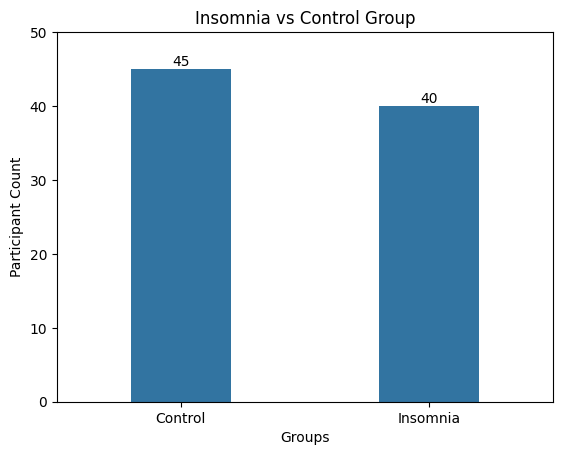

In [54]:
a = sns.countplot(data=df, x='Group', width=0.4) # countplot displays number of observations in each category 
a.bar_label(a.containers[0])

plt.ylim([0,50])
plt.ylabel('Participant Count')
plt.xlabel('Groups')
plt.title('Insomnia vs Control Group')

plt.show()

40 out of 95 participants have insomnia, while the rest are part of the control group. 

##### Q: What is the sex of each participant?  

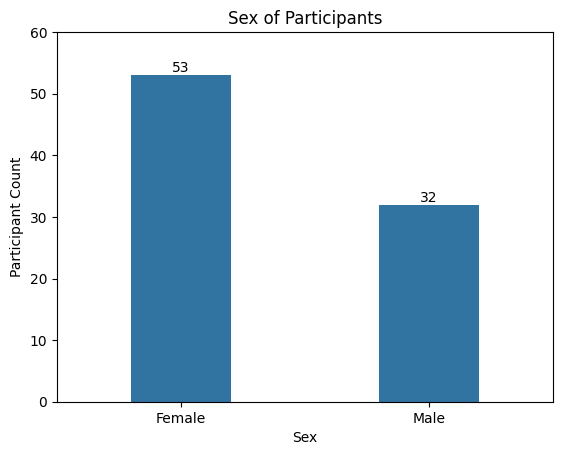

In [55]:
a = sns.countplot(data=df, x='Sex', width=0.4)
a.bar_label(a.containers[0])

plt.ylim([0, 60])
plt.ylabel('Participant Count')
plt.title('Sex of Participants')

plt.show()

There are 53 females and 32 males. 

##### Q: What are the participants' ages? 

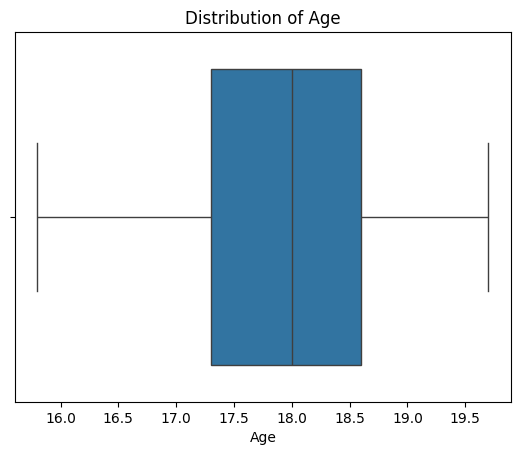

In [106]:
x = sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')

plt.show()

In [88]:
print(min(df['Age']), max(df['Age']))

15.8 19.7


Median age is 18. All participants are over the age of 15. 

##### Q: What is the distribution of anxiety before bedtime? 

Glasgow Content of Thoughts Inventory (GCTI): a new measure for the assessment of pre-sleep cognitive activity. 

The higher the score, the greater the intrusiveness and frequency of dysfunctional thoughts at bedtime. 

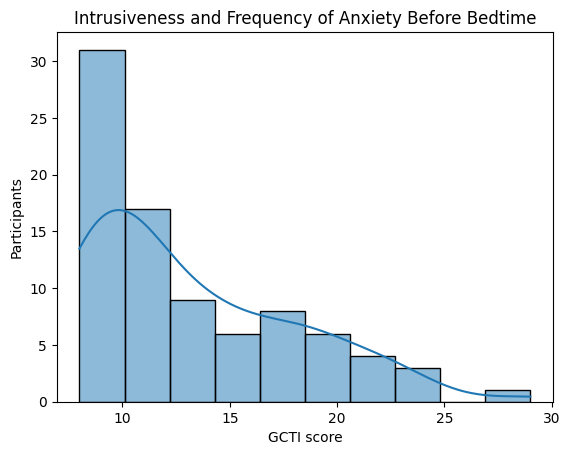

In [58]:
sns.histplot(df['GCTI_anxiety'], bins=10, kde=True)

plt.ylabel('Participants')
plt.xlabel('GCTI score')
plt.title('Intrusiveness and Frequency of Anxiety Before Bedtime')

plt.show()

You can see this is right-skewed data. 

Here the distribution tells us that most participants have less anxiety before bedtime. The anxiety of participants before bedtime increases as we move to the right.

In [59]:
res = stats.skewtest(df['GCTI_anxiety'])
print(res.statistic)

if res.statistic > 0:
    print("The 'GCTI_anxiety' distribution is right-skewed.")
elif res.statistic < 0:
    print("The 'GCTI_anxiety' distribution is left-skewed.")
else:
    print("The 'GCTI_anxiety' distribution is approximately symmetric.")

3.2880925219626644
The 'GCTI_anxiety' distribution is right-skewed.


##### Q: What is the gender distribution among those with versus without insomnia? 

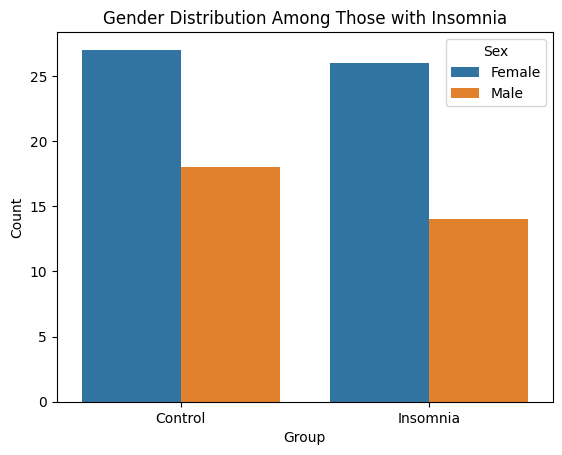

In [60]:
sns.countplot(x='Group', hue='Sex', data=df)

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Gender Distribution Among Those with Insomnia')

plt.legend(title='Sex', loc='upper right')

plt.show()

The amount of females with insomnia is about the same, while the amount of males with insomnia is lower than the control group. 

##### Let's explore the stress domain related to insomnia disorder. 

Under the **stress domain** falls the ASQ (Adolescent Stress Questionairre) and PSRS (Percieved Stress Reactivity Scale) variables. 

ASQ measures 10 different adolescent-specific stress components or domains: home life, school attendance, school performance, peer pressure, emerging adult responsibility, school/leisure conflict, romantic relationships, teacher interaction, future uncertainty, and financial pressures. 

* 5-point Likert-type scale answers ( E.g., “Keeping up with schoolwork”. )

    1 = Not at all stressful (or is irrelevant to me)

    2 = A little stressful

    3 = Moderately stressful

    4 = Quite stressful

    5 = Very stressful

* Scale scores were calculated by **summation of items**.

In [61]:
# Let's find all ASQ columns 

# Create a new column to store the names of columns where the word is found
varis['ASQ_columns'] = varis.apply(lambda row: ', '.join([col for col in varis.columns if str(row[col]).lower().find('ASQ'.lower()) != -1]), axis=1)

# Filter rows where the word is found
filtered_varis = varis[varis['ASQ_columns'] != '']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

filtered_varis[['ASQ_columns']]


,ASQ_columns
0,"asq_home, asq_school, asq_attendance, asq_romantic, asq_peer, asq_teacher, asq_future, asq_leisure, asq_finance, asq_responsibility, casq_total, casq_sleepy, casq_alert"


##### Q: How stressful is home for each participant? 

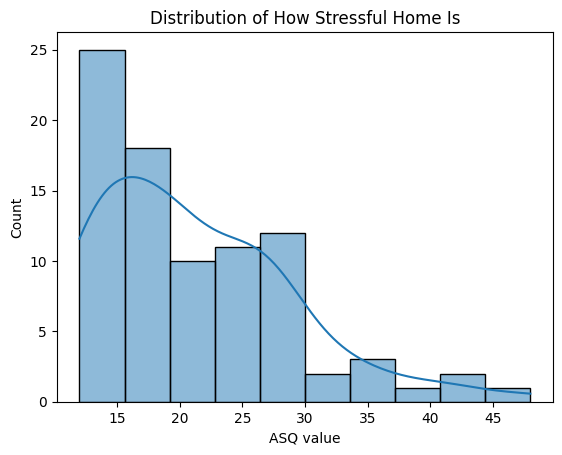

In [63]:
sns.histplot(df['asq_home'], bins=10, kde=True)

plt.xlabel('ASQ value')
plt.title('Distribution of How Stressful Home Is')
plt.show()

The distribution of how stressful home is for adolescents is rightly skewed. Home is not very stressful for a majority of the participants. 

##### Q: Do participants with insomnia feel more stress at home than the control group? 

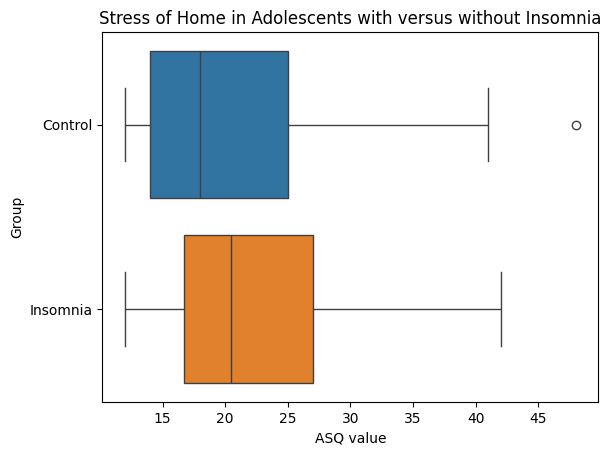

In [64]:
sns.boxplot(x='asq_home', y='Group', data=df, hue='Group')

plt.xlabel('ASQ value')
plt.title('Stress of Home in Adolescents with versus without Insomnia')

plt.show()

There is one outlier. In this dataset with a relatively small sample size, outliers may influence summary statistics. 

In this case, it is safe to conclude that insomnia group will still have a higher stress average than the control group without the outlier. 

##### Q: Do participants with insomnia feel more stress with school performance than the control group? 

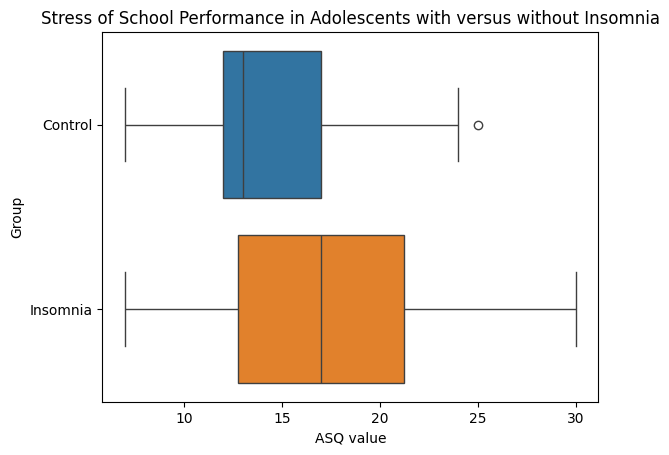

In [65]:
sns.boxplot(x='asq_school', y='Group', data=df, hue='Group')

plt.xlabel('ASQ value')
plt.title('Stress of School Performance in Adolescents with versus without Insomnia')

plt.show()

On average, participants with insomnia experience more stress of school performance than participants in the control group. 

##### Q: Which factor causes the most versus least stress in the participants? 

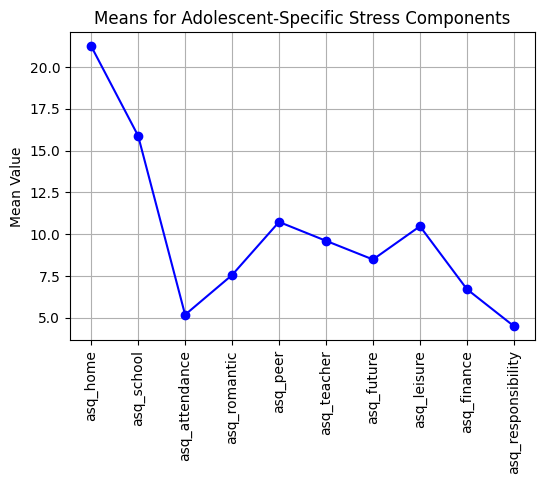

In [66]:
# Let's create a line plot of the means of each column 

# Specify the columns you want to include
selected_columns = ['asq_home', 'asq_school', 'asq_attendance', 'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure', 'asq_finance', 'asq_responsibility']

# Filter the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Calculate the mean for each selected column
means = selected_df.mean()

# Create a line plot
plt.figure(figsize=(6, 4))
plt.plot(means.index, means.values, marker='o', linestyle='-', color='b')
plt.title('Means for Adolescent-Specific Stress Components')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Home-life seems the most stressful while emerging adult responsibility seems the least stressful. 

##### Q: Which factor causes the most versus least stress in participants with versus without insomnia? 

<Figure size 1200x800 with 0 Axes>

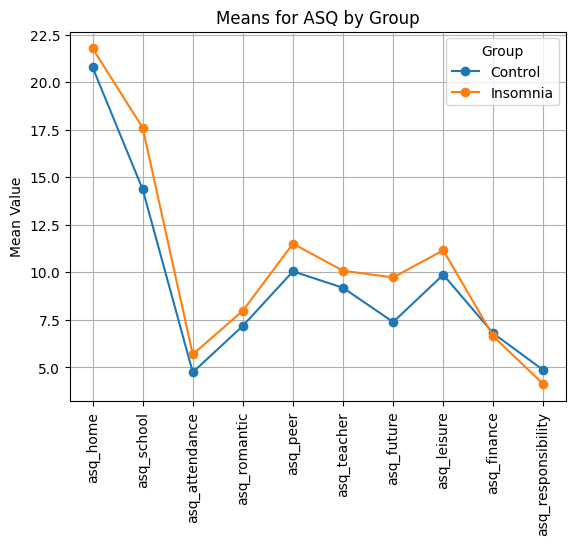

In [67]:
selected_columns = ['asq_home', 'asq_school', 'asq_attendance', 'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure', 'asq_finance', 'asq_responsibility', 'Group']

selected_df = df[selected_columns]

grouped_means = selected_df.groupby('Group').mean()

transposed_means = grouped_means.transpose()

plt.figure(figsize=(12, 8))
transposed_means.plot(marker='o', linestyle='-')
plt.title('Means for ASQ by Group')
plt.ylabel('Mean Value')

plt.xticks(np.arange(10), selected_columns[0:10], rotation=90)
plt.legend(('Control', 'Insomnia'), title='Group')

plt.grid(True)
plt.show()

It appears the insomnia group experiences higher stress levels regarding most components on average. 

* PSRS measures typical stress responses to different generalized situations: reactivity to social evaluation, reactivity to failure, reactivity to social conflicts, reactivity to work overload, and prolonged reactivity.

* It is a 23-item questionnaire with 5 subscales and 1 overall scale. Each item presents a potentially stressful stimulus (e.g. ‘When I speak in front of other peoples.’) and offers a choice of three response options for the participant to choose from (e.g. ‘I often get very nervous, ‘I often get somewhat nervous’ or ‘In general, I stay calm’). 

* Responses are coded on a scale of zero to two, with the answer representing the least reactivity scoring zero, and the answer representing the most reactivity scoring two. The sum of the mean scores on each subscale indicates the **participant's total stress reactivity**.

In [68]:
varis['found_in_columns'] = varis.apply(lambda row: ', '.join([col for col in varis.columns if str(row[col]).lower().find('PSRS'.lower()) != -1]), axis=1)

filtered_varis = varis[varis['found_in_columns'] != '']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

filtered_varis[['found_in_columns']]

,found_in_columns
0,"PSRS_PrR, PSRS_RWO, PSRS_RSC, PSRS_FRa, PSRS_RSE, PSRS_total"


##### Q: Which factor causes the highest versus lowest stress response in participants? 

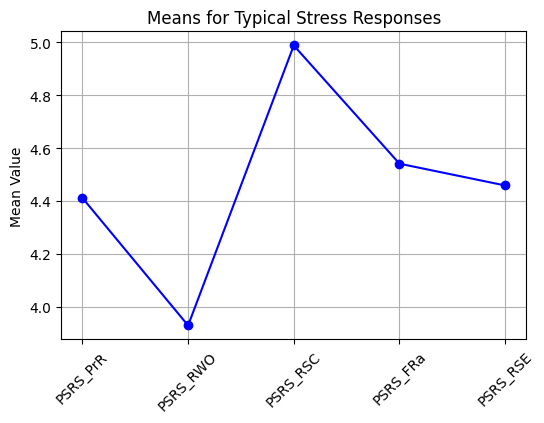

In [69]:
selected_columns = ['PSRS_PrR', 'PSRS_RWO', 'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE']

selected_df = df[selected_columns]

means = selected_df.mean()

plt.figure(figsize=(6, 4))

plt.plot(means.index, means.values, marker='o', linestyle='-', color='b')

plt.title('Means for Typical Stress Responses')
plt.ylabel('Mean Value')

plt.xticks(rotation=45)

plt.grid(True)

plt.show()

In [70]:
print(varis['PSRS_RSC'])
print(varis['PSRS_RWO'])

0    PSRS Reactivity to Social Conflict (RSC) (Perceived Stress Reactivity Scale)
Name: PSRS_RSC, dtype: object
0    PSRS Reactivity to Work Overload (RWO) (Perceived Stress Reactivity Scale)
Name: PSRS_RWO, dtype: object


It seems participants get the most nervous when they have a social conflict, and the least when they have a work overload. 

##### Q: Which factor causes the highest versus lowest stress response in participants with versus without insomnia? 

<Figure size 1200x800 with 0 Axes>

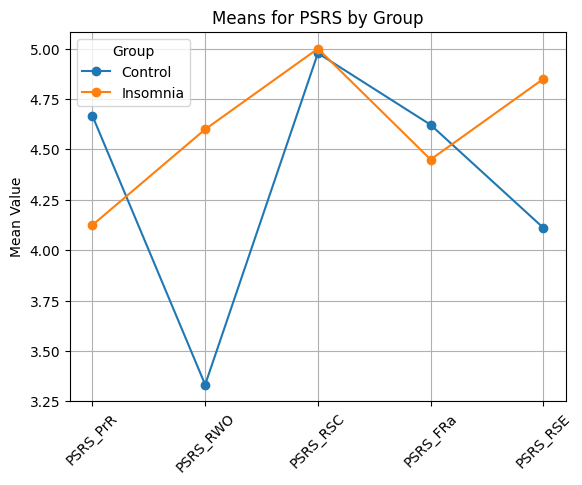

In [85]:
selected_columns = ['PSRS_PrR', 'PSRS_RWO', 'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE', 'Group']

selected_df = df[selected_columns]

grouped_means = selected_df.groupby('Group').mean()

transposed_means = grouped_means.transpose()

# Create  a line plot 

plt.figure(figsize=(12, 8))
transposed_means.plot(marker='o', linestyle='-')
plt.title('Means for PSRS by Group')
plt.ylabel('Mean Value')

plt.xticks(np.arange(5), selected_columns[0:5], rotation=45) 
plt.legend(('Control', 'Insomnia'), title='Group')

plt.grid(True)
plt.show()

There appears to be more significant differences between the groups. The insomnia group mean is not always higher. 

* The most significant difference is that participants with insomnia have a higher stress reactivity to work overload. 

* The stress reactivity to social conflict is the highest out of all factors, and just about the same for both groups. 

##### Q: What is the stress reactivity to work overload for adolescents with versus without insomnia? 

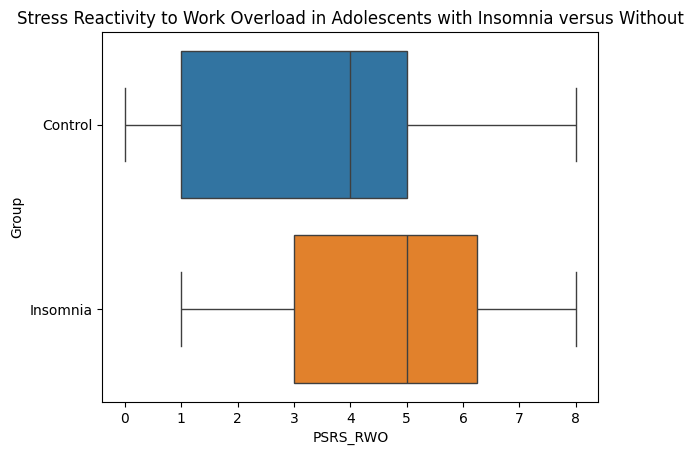

In [ ]:
sns.boxplot(x='PSRS_RWO', y='Group', data=df, hue='Group')

plt.title('Stress Reactivity to Work Overload in Adolescents with Insomnia versus Without')

plt.show()

Patients with insomnia have a higher stress response to work overload than the control group, on average. 

##### Q: Is there a correlation between worries before bedtime and a participant's pubertal developmental score? 

Text(0, 0.5, 'PDS value')

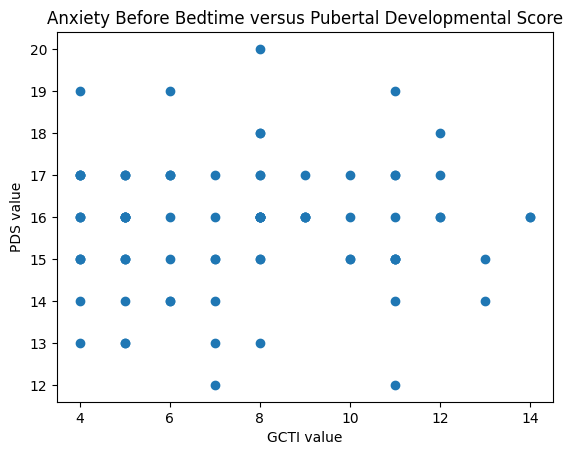

In [ ]:
plt.scatter(x=df['GCTI_worries'], y=df['PDS'])

plt.title('Anxiety Before Bedtime versus Pubertal Developmental Score')
plt.xlabel('GCTI value')
plt.ylabel('PDS value')

There appears to be no correlation. 

##### Q: Is there a correlation between a participant's total intrusiveness and frequency of dysfunctional thoughts at bedtime and their stress of school performance? 

Text(0, 0.5, 'ASQ value')

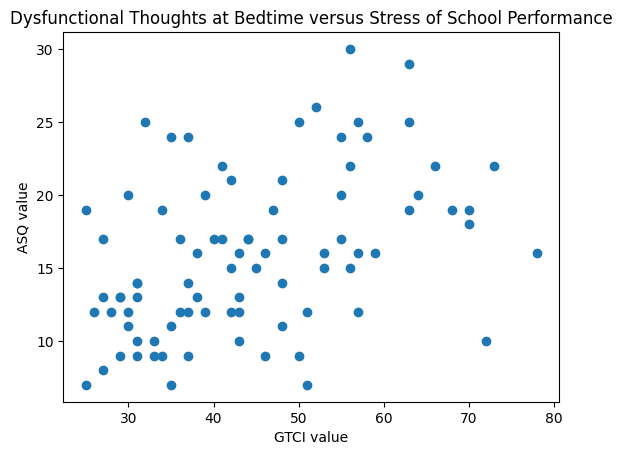

In [ ]:
plt.scatter(x=df['GCTI_total'], y=df['asq_school'])

plt.title('Dysfunctional Thoughts at Bedtime versus Stress of School Performance')
plt.xlabel('GTCI value')
plt.ylabel('ASQ value')

In [ ]:
correlation_coefficient = df['GCTI_total'].corr(df['asq_school'])

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.42964151204287926


There is a weak positive correlation. 

As a participant's stress of school performance increases, so does their total dysfunctional thoughts at bedtime. 

##### Q: Is there a correlation between participants total stress reactivity and their total intrusiveness and frequency of dysfunctional thoughts at bedtime? 

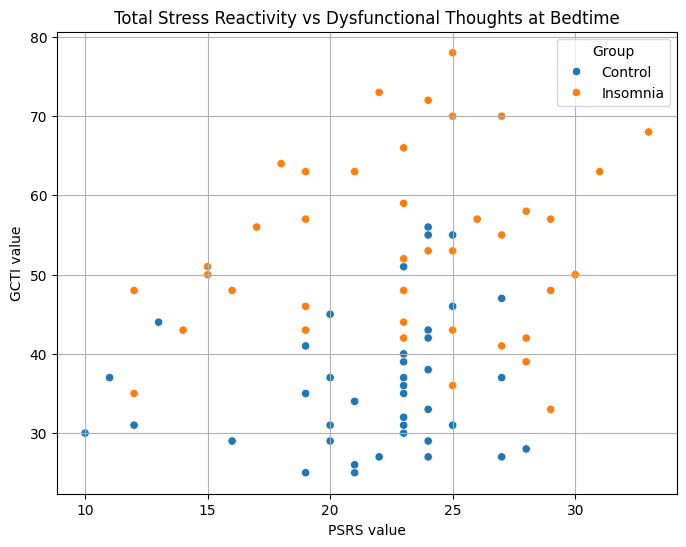

In [ ]:
group_column = 'Group'
x_column = 'PSRS_total'
y_column = 'GCTI_total'

# Create a scatter plot with grouping
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_column, y=y_column, hue=group_column, data=df)
plt.title(f'Total Stress Reactivity vs Dysfunctional Thoughts at Bedtime')
plt.xlabel('PSRS value')
plt.ylabel('GCTI value')
plt.grid(True)
plt.show()

There appears to be a weak positive correlation. 

Participants with insomnia tend to have higher stress reactivity and total intrusiveness and frequency of dysfunctional thoughts. 

##### Let's explore the participants' coping skills (COPE). 

* The response options range between 1(” I usually don't do this at all”) and (4: “I usually do this a lot.”). 

* The scale does not have a composite score.

In [ ]:
varis['cope_columns'] = varis.apply(lambda row: ', '.join([col for col in varis.columns if str(row[col]).lower().find('cope'.lower()) != -1]), axis=1)

filtered_varis = varis[varis['cope_columns'] != '']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

filtered_varis[['cope_columns']]

,cope_columns
0,"cope_growth, cope_mental_disengage, cope_emotions, cope_seek_social_instr_supp, cope_active, cope_denial, cope_religion, cope_humor, cope_behav_disengage, cope_restraint, cope_seek_social_emo_supp, cope_substance_use, cope_acccept, cope_suppression, cope_planning"


In [ ]:
varis['cope_growth']

0    Positive Reinterpretation & Growth COPE (Coping skills)
Name: cope_growth, dtype: object

##### Q: Do people with insomnia cope using humor more than the control group? 

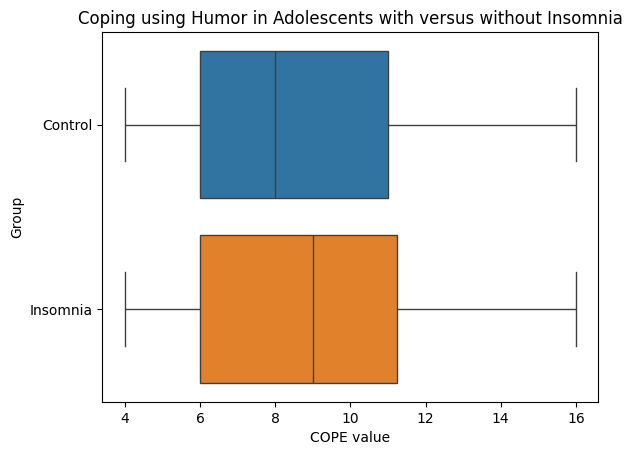

In [ ]:
sns.boxplot(x='cope_humor', y='Group', data=df, hue='Group')

plt.xlabel('COPE value')
plt.title('Coping using Humor in Adolescents with versus without Insomnia')

plt.show()

On average, participants with insomnia tend to cope with humor more than the control group. 

##### Q: Do people with insomnia cope using positive reinterpretation more than the control group? 

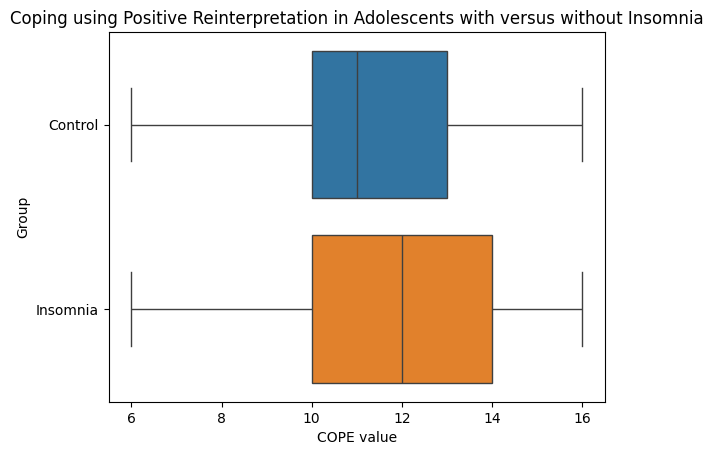

In [ ]:
sns.boxplot(x='cope_growth', y='Group', data=df, hue='Group')

plt.xlabel('COPE value')
plt.title('Coping using Positive Reinterpretation in Adolescents with versus without Insomnia')

plt.show()

On average, more participants with insomnia use positive reinterpretation as a coping mechanism. 

##### Q: How many participants tend to cope using humor when they experience stressful events? 

Text(0, 0.5, 'ASQ value')

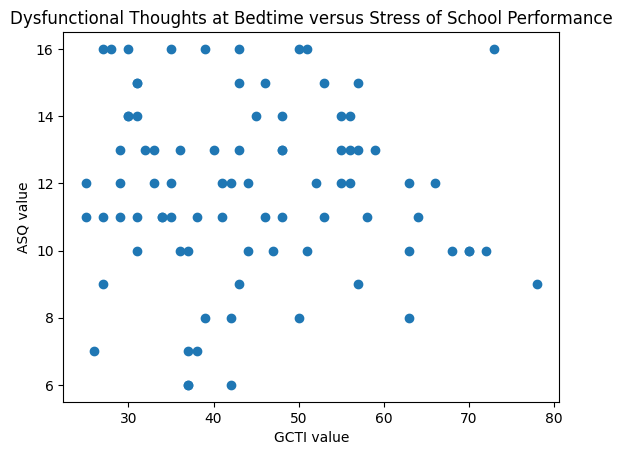

In [ ]:
plt.scatter(x=df['GCTI_total'], y=df['cope_growth'])

plt.title('Dysfunctional Thoughts at Bedtime versus Stress of School Performance')
plt.xlabel('GCTI value')
plt.ylabel('ASQ value')

There appears to be a weak positive correlation. 

The higher intrusiveness and frequency of dysfunctional thoughts at bedtime, the higher the stress of school performance. This relationship is not particularly strong. 

##### Q: How do positive coping mechanisms vary in participants with versus without insomnia? 

<Figure size 1200x800 with 0 Axes>

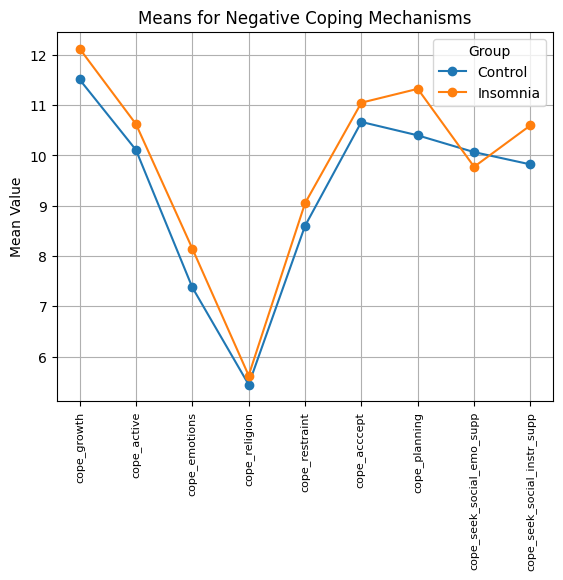

In [77]:
selected_columns = ['cope_growth', 'cope_active', 'cope_emotions', 
                    'cope_religion', 'cope_restraint', 'cope_acccept', 'cope_planning', 'cope_seek_social_emo_supp', 'cope_seek_social_instr_supp', 
                    'Group']

selected_df = df[selected_columns]

grouped_means = selected_df.groupby('Group').mean()

transposed_means = grouped_means.transpose()

plt.figure(figsize=(12, 8))
transposed_means.plot(marker='o', linestyle='-')
plt.title('Means for Negative Coping Mechanisms')
plt.ylabel('Mean Value')

plt.xticks(np.arange(9), selected_columns[0:9], rotation=90, fontsize=8)
plt.legend(('Control', 'Insomnia'), title='Group')

plt.grid(True)
plt.show()

On average, participants use positive reinforcement the most as a coping mechanism and religion the least. 

The insomnia group appears to use these positive coping mechanisms slightly more than the control group. 

##### Q: How do negative coping mechanisms vary in participants with insomnia versus without? 

<Figure size 1200x800 with 0 Axes>

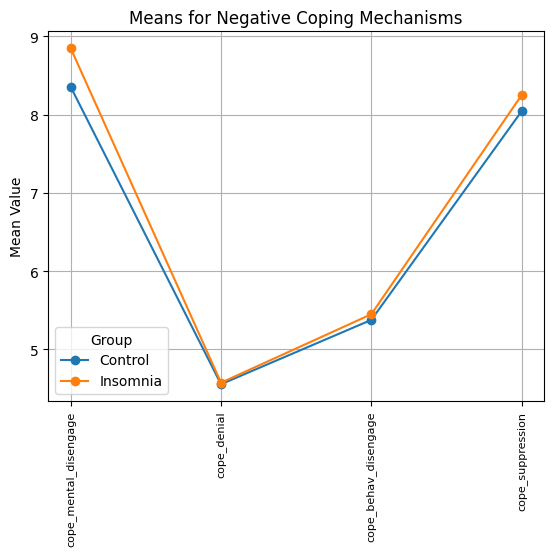

In [79]:
selected_columns = ['cope_mental_disengage', 
                    'cope_denial', 'cope_behav_disengage', 'cope_suppression', 'Group']

selected_df = df[selected_columns]

grouped_means = selected_df.groupby('Group').mean()

transposed_means = grouped_means.transpose()

plt.figure(figsize=(12, 8))
transposed_means.plot(marker='o', linestyle='-')
plt.title('Means for Negative Coping Mechanisms')
plt.ylabel('Mean Value')

plt.xticks(np.arange(4), selected_columns[0:4], rotation=90, fontsize=8)
plt.legend(('Control', 'Insomnia'), title='Group')

plt.grid(True)
plt.show()

There appears to be no significant difference between groups and their negative coping mechanisms. 

##### Q: Is there a significant difference in coping mechanisms based on insomnia severity? 

<Figure size 1200x800 with 0 Axes>

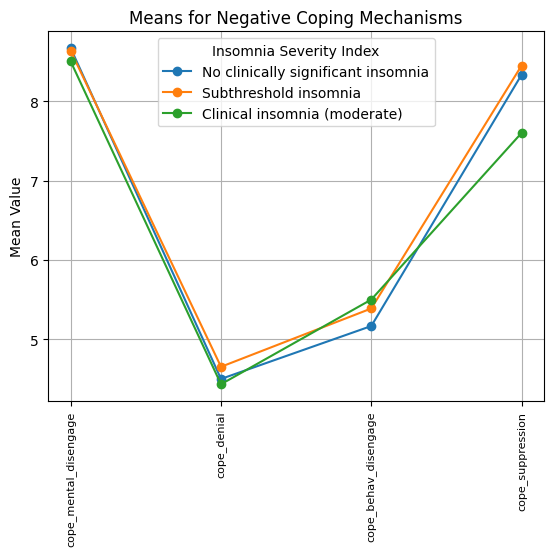

In [87]:
# Negative coping mechanisms 

selected_columns = ['cope_mental_disengage', 
                    'cope_denial', 'cope_behav_disengage', 'cope_suppression', 'ISI_total']

selected_df = df[selected_columns]

grouped_means = selected_df.groupby('ISI_total').mean()

transposed_means = grouped_means.transpose()

plt.figure(figsize=(12, 8))
transposed_means.plot(marker='o', linestyle='-')
plt.title('Means for Negative Coping Mechanisms')
plt.ylabel('Mean Value')

plt.xticks(np.arange(4), selected_columns[0:4], rotation=90, fontsize=8)
plt.legend(('No clinically significant insomnia', 'Subthreshold insomnia', 
            'Clinical insomnia (moderate)', 'Clinical insomnia (severe)'), title='Insomnia Severity Index')

plt.grid(True)
plt.show()

There is not a significant difference between insomnia severity and negative coping mechanisms. 

### Summary 

* The (ASQ) factor that causes the most stress in participants is home-life, while the stress of emerging adult responsibility causes the least stress. 
* Participants with insomnia tend to experience higher stress levels than the control group. 

* Participants have the highest stress response (PSRS) to social conflict and the lowest stress response to work overload. 

* Overall, participants with insomnia tend to have higher stress reactivity and total intrusiveness and frequency of dysfunctional thoughts. 

* There appears to be no significant difference in coping mechanisms between the insomnia and control group. 
* On average, participants use positive reinforcement the most as a coping mechanism and denial the least. 

### Recommendations 

1. Addressing home-life 
    
    Consider finding a support network for participants to navigate and manage challenges related to their home life. 

2. Insomnia and stress reduction

    Develop and promote programs to address insomnia, as participants with insomnia experience higher stress levels. This could include sleep hygiene education, relaxation techniques, or counseling services to help improve sleep quality.

3. Stress reactivity and dysfunctional thoughts

    Provide interventions or counseling services that specifically target stress reactivity and dysfunctional thoughts for participants with insomnia, as they tend to have higher levels in these areas.

4. Coping mechanisms 
    
    Explore ways to reduce reliance on less effective coping mechanisms, such as mental disengagement and suppressing emotions. This could involve educational programs on the importance of acknowledging and addressing stressors.

5. Individualized support

    Recognize that individuals may have different stressors and coping mechanisms. Consider providing personalized support or counseling services to address individual needs.
